# Car Price Prediction
This notebook demonstrates the process of building a machine learning model to predict car prices based on various features such as mileage, engine size, fuel type, and more. The dataset used for this project is the 'CarDekho' dataset, which contains information on various cars along with their selling prices. The goal is to preprocess the data, explore it, build different regression models, and select the best model based on performance metrics.

## Overview
The notebook is organized into the following sections:

1. **Load Data**: Load the dataset and display its initial structure and summary statistics.
2. **Exploratory Data Analysis (EDA)**: Conduct a detailed analysis of the dataset to understand the distribution of data and relationships between features.
3. **Data Preprocessing**: Handle missing values, encode categorical variables, and address data skewness and outliers.
4. **Model Training and Evaluation**: Train multiple regression models, evaluate their performance using metrics such as mean squared error, and visualize actual vs. predicted values.
5. **Model Selection**: Identify the best-performing model based on evaluation metrics.
6. **Feature Importance Analysis**: Analyze the importance of different features in the best model.
7. **Save Models and Encoders**: Save the trained model and label encoders for future use.

By following these steps, we aim to build an effective model for predicting car prices and gain insights into the key factors influencing car prices.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from copy import deepcopy
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import joblib

# Load data

In [2]:
df = pd.read_csv('/kaggle/input/car-price-prediction-dataset/cardekho.csv')
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0


In [3]:
# Show the shape of the dataset
df.shape

(8128, 12)

In [4]:
# Show some statistical information about dataset
df.describe()

,year,selling_price,km_driven,mileage(km/ltr/kg),engine,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000,7907.000000,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,19.418783,1458.625016,5.416719
std,4.044249,8.062534e+05,5.655055e+04,4.037145,503.916303,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,16.780000,1197.000000,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,19.300000,1248.000000,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,22.320000,1582.000000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,14.000000


In [5]:
columns_names = df.columns
columns_names

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage(km/ltr/kg)', 'engine', 'max_power',
       'seats'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                8128 non-null   object 
 1   year                8128 non-null   int64  
 2   selling_price       8128 non-null   int64  
 3   km_driven           8128 non-null   int64  
 4   fuel                8128 non-null   object 
 5   seller_type         8128 non-null   object 
 6   transmission        8128 non-null   object 
 7   owner               8128 non-null   object 
 8   mileage(km/ltr/kg)  7907 non-null   float64
 9   engine              7907 non-null   float64
 10  max_power           7913 non-null   object 
 11  seats               7907 non-null   float64
dtypes: float64(3), int64(3), object(6)
memory usage: 762.1+ KB


# Exploratory data analysis

In [7]:
# Take copy from data to make processes on
preprocessed_df = deepcopy(df)

In [8]:
# Show all types of columns in the data
preprocessed_df.dtypes

name                   object
year                    int64
selling_price           int64
km_driven               int64
fuel                   object
seller_type            object
transmission           object
owner                  object
mileage(km/ltr/kg)    float64
engine                float64
max_power              object
seats                 float64
dtype: object

In [9]:
# Check about none values in data to decide if we will make data cleaning or not
preprocessed_df.isnull().sum()

name                    0
year                    0
selling_price           0
km_driven               0
fuel                    0
seller_type             0
transmission            0
owner                   0
mileage(km/ltr/kg)    221
engine                221
max_power             215
seats                 221
dtype: int64

## Handling missing values

In [10]:
# Handle missing values of float columns that are mileage(km/ltr/kg), engine, seats
column_float_imputed = ['mileage(km/ltr/kg)', 'engine','seats']
preprocessed_df[column_float_imputed] = preprocessed_df[column_float_imputed].fillna(preprocessed_df[column_float_imputed].mean())

In [11]:
preprocessed_df.isnull().sum()

name                    0
year                    0
selling_price           0
km_driven               0
fuel                    0
seller_type             0
transmission            0
owner                   0
mileage(km/ltr/kg)      0
engine                  0
max_power             215
seats                   0
dtype: int64

In [12]:
# Handle missing values of textual column max_power
max_power_col = 'max_power'
preprocessed_df[max_power_col] = preprocessed_df[max_power_col].fillna(preprocessed_df[max_power_col].mode()[0])

In [13]:
# Check about missing values again
preprocessed_df.isnull().sum()

name                  0
year                  0
selling_price         0
km_driven             0
fuel                  0
seller_type           0
transmission          0
owner                 0
mileage(km/ltr/kg)    0
engine                0
max_power             0
seats                 0
dtype: int64

## Handling invalid data

In [14]:
# Get textual columns by select dtypes function
textual_columns = preprocessed_df.select_dtypes(include = ['object']).columns
textual_columns

Index(['name', 'fuel', 'seller_type', 'transmission', 'owner', 'max_power'], dtype='object')

In [15]:
preprocessed_df[textual_columns]

,name,fuel,seller_type,transmission,owner,max_power
0,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner,74
1,Skoda Rapid 1.5 TDI Ambition,Diesel,Individual,Manual,Second Owner,103.52
2,Honda City 2017-2020 EXi,Petrol,Individual,Manual,Third Owner,78
3,Hyundai i20 Sportz Diesel,Diesel,Individual,Manual,First Owner,90
4,Maruti Swift VXI BSIII,Petrol,Individual,Manual,First Owner,88.2
...,...,...,...,...,...,...
8123,Hyundai i20 Magna,Petrol,Individual,Manual,First Owner,82.85
8124,Hyundai Verna CRDi SX,Diesel,Individual,Manual,Fourth & Above Owner,110
8125,Maruti Swift Dzire ZDi,Diesel,Individual,Manual,First Owner,73.9
8126,Tata Indigo CR4,Diesel,Individual,Manual,First Owner,70


In [16]:
# Convert textual max power columns into numerical column
spaces_count = preprocessed_df['max_power'].apply(lambda x: x.count(' ')).sum()
spaces_count

1

In [17]:
# Replace each space with string zero
preprocessed_df['max_power'] = preprocessed_df['max_power'].str.replace(' ', '0')

In [18]:
# Convert max power column from textual into numerical
preprocessed_df['max_power'] = preprocessed_df['max_power'].astype(float)

In [19]:
textual_colmns = preprocessed_df.select_dtypes(include=['object'])
textual_columns_names = textual_colmns.columns
textual_colmns

,name,fuel,seller_type,transmission,owner
0,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner
1,Skoda Rapid 1.5 TDI Ambition,Diesel,Individual,Manual,Second Owner
2,Honda City 2017-2020 EXi,Petrol,Individual,Manual,Third Owner
3,Hyundai i20 Sportz Diesel,Diesel,Individual,Manual,First Owner
4,Maruti Swift VXI BSIII,Petrol,Individual,Manual,First Owner
...,...,...,...,...,...
8123,Hyundai i20 Magna,Petrol,Individual,Manual,First Owner
8124,Hyundai Verna CRDi SX,Diesel,Individual,Manual,Fourth & Above Owner
8125,Maruti Swift Dzire ZDi,Diesel,Individual,Manual,First Owner
8126,Tata Indigo CR4,Diesel,Individual,Manual,First Owner


## Label encoding textual columns

In [20]:
# Dictionary to store the encoders
label_encoders = {}

# Fit and transform each textual column, saving the encoders
for col in textual_columns_names:
    label_encoder = LabelEncoder()
    preprocessed_df[col] = label_encoder.fit_transform(preprocessed_df[col])
    label_encoders[col] = label_encoder

In [21]:
preprocessed_df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,1307,2014,450000,145500,1,1,1,0,23.40,1248.0,74.00,5.0
1,1607,2014,370000,120000,1,1,1,2,21.14,1498.0,103.52,5.0
2,385,2006,158000,140000,3,1,1,4,17.70,1497.0,78.00,5.0
3,781,2010,225000,127000,1,1,1,0,23.00,1396.0,90.00,5.0
4,1349,2007,130000,120000,3,1,1,0,16.10,1298.0,88.20,5.0


In [22]:
# Check about if there is any extra textual columns
preprocessed_df.select_dtypes(include=['object']).columns

Index([], dtype='object')

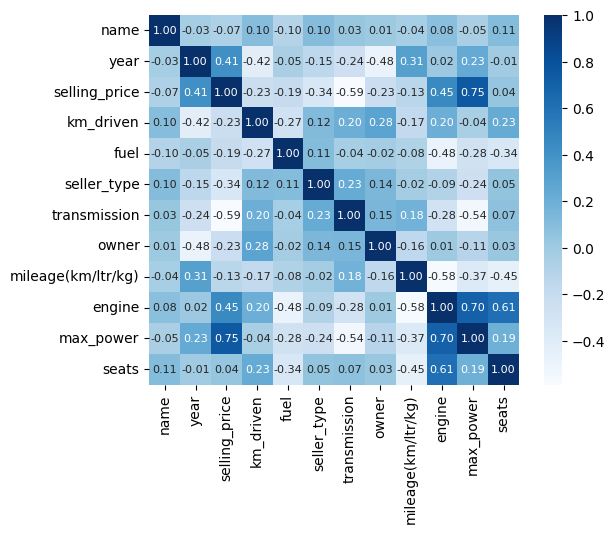

In [23]:
correlation = preprocessed_df.corr()
sns.heatmap(correlation, cbar=True,square=True,fmt='.2f',annot=True,annot_kws={'size':8},cmap = 'Blues')
plt.show()

<Axes: >

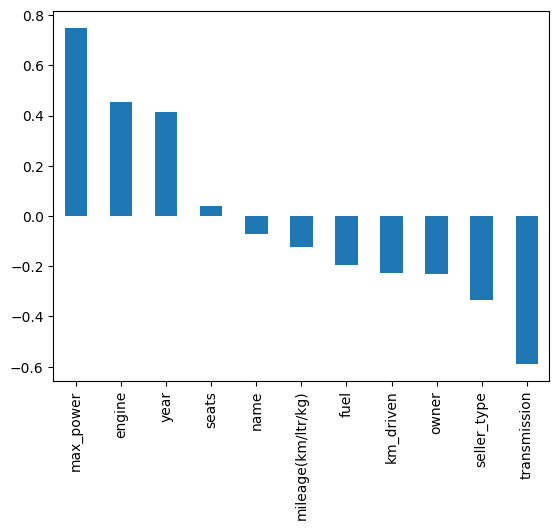

In [24]:
# plot correlation degree between selling price column and other columns
correlation['selling_price'].drop('selling_price').sort_values(ascending = False).plot(kind = 'bar')

## Handling outliers

name                  -0.052374
year                  -1.072293
km_driven             11.170910
fuel                   0.177285
seller_type           -0.930304
transmission          -2.211584
owner                  1.258876
mileage(km/ltr/kg)    -0.144647
engine                 1.151019
max_power              1.660637
seats                  1.997244
dtype: float64


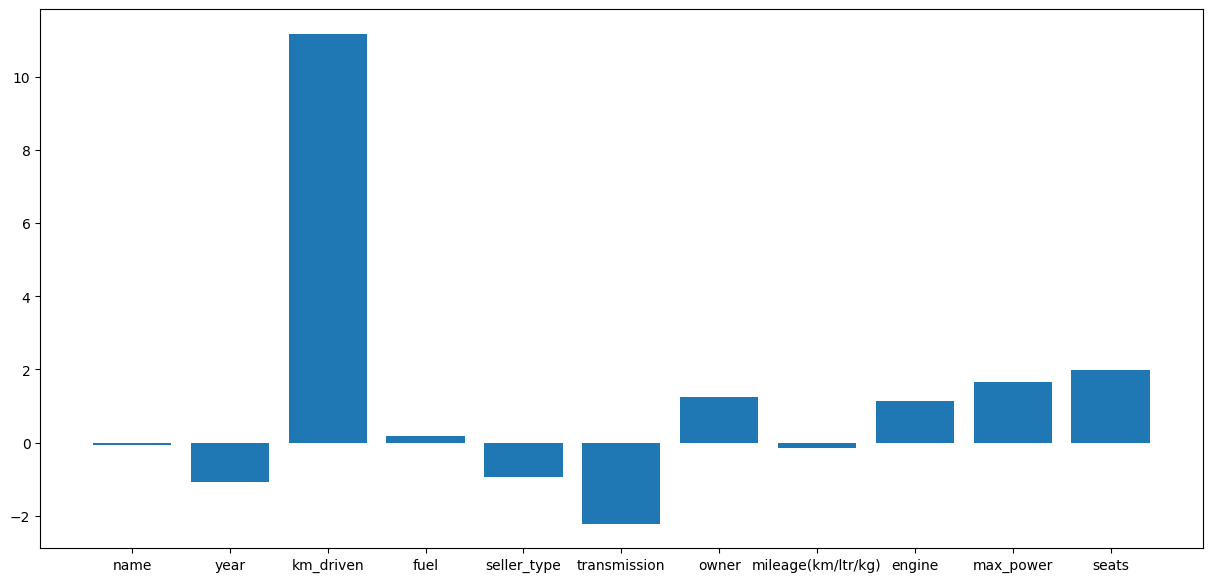

In [25]:
# Check Skewness for each column
column_skewed = preprocessed_df.columns.drop('selling_price')
skewness = preprocessed_df.drop(columns = ['selling_price']).skew()
print(skewness)

plt.figure(figsize = (15,7))
plt.bar(column_skewed, skewness)
plt.show()

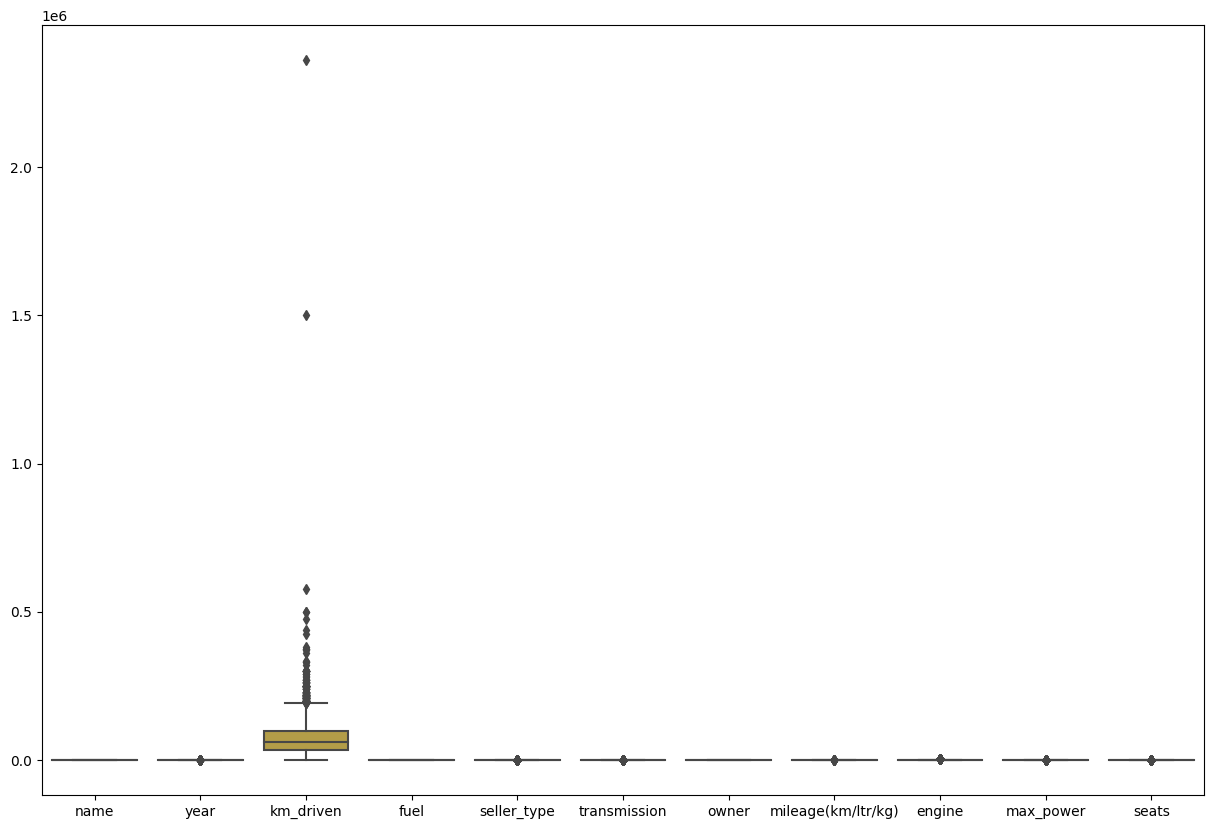

In [26]:
# Visualize box plot for dataframe
plt.figure(figsize = (15,10))
sns.boxplot(data = preprocessed_df.drop(columns = ['selling_price']))
plt.show()

In [27]:
# Find skewness for km driven column alone to handle it 
preprocessed_df['km_driven'].skew()

11.170909783549087

In [28]:
# Handle skewness of km driven columns by taking the log function for it
preprocessed_df['km_driven'] = np.log(preprocessed_df['km_driven'])

In [29]:
# Find skewness for km driven column after we handled it
preprocessed_df['km_driven'].skew()

-1.2850452454119017

<BarContainer object of 11 artists>

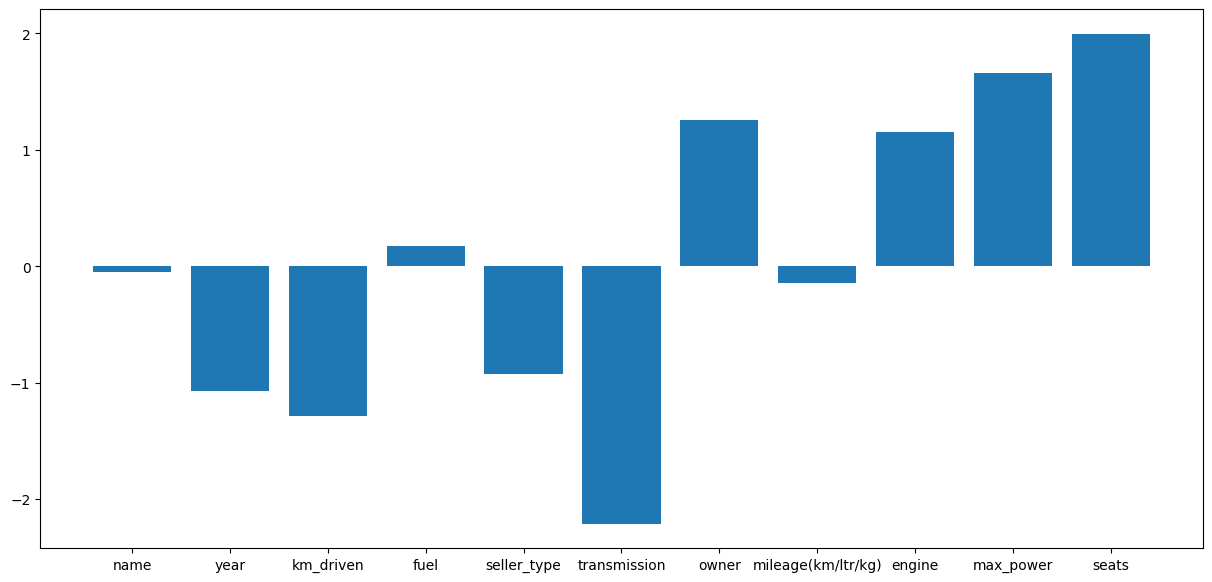

In [30]:
# Check Skewness for each column after the handling process
column_skewed = preprocessed_df.columns.drop('selling_price')
skewness = preprocessed_df.drop(columns = ['selling_price']).skew()

plt.figure(figsize = (15,7))
plt.bar(column_skewed, skewness)

In [31]:
# Show first samples of dataframe after preprocessing 
preprocessed_df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,1307,2014,450000,11.887931,1,1,1,0,23.40,1248.0,74.00,5.0
1,1607,2014,370000,11.695247,1,1,1,2,21.14,1498.0,103.52,5.0
2,385,2006,158000,11.849398,3,1,1,4,17.70,1497.0,78.00,5.0
3,781,2010,225000,11.751942,1,1,1,0,23.00,1396.0,90.00,5.0
4,1349,2007,130000,11.695247,3,1,1,0,16.10,1298.0,88.20,5.0


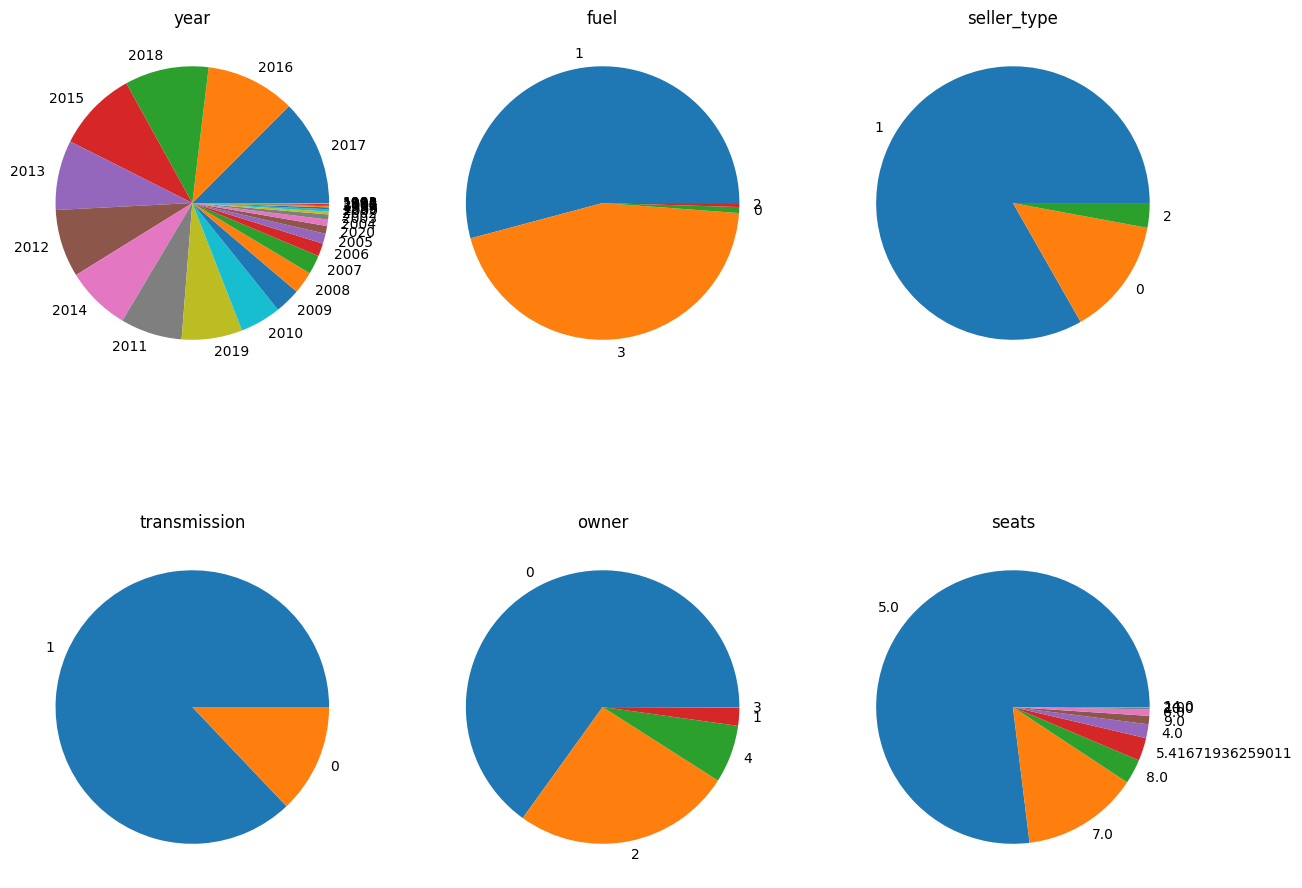

In [32]:
categorical_columns = ['year', 'fuel','seller_type', 'transmission','owner','seats']
plt.figure(figsize = (15,12))
for index, col in enumerate(categorical_columns):
    values_count = preprocessed_df[col].value_counts()
    plt.subplot(2, 3, index + 1)
    plt.axis('off')
    plt.title(col)
    plt.pie(values_count, labels=values_count.index)
plt.show()

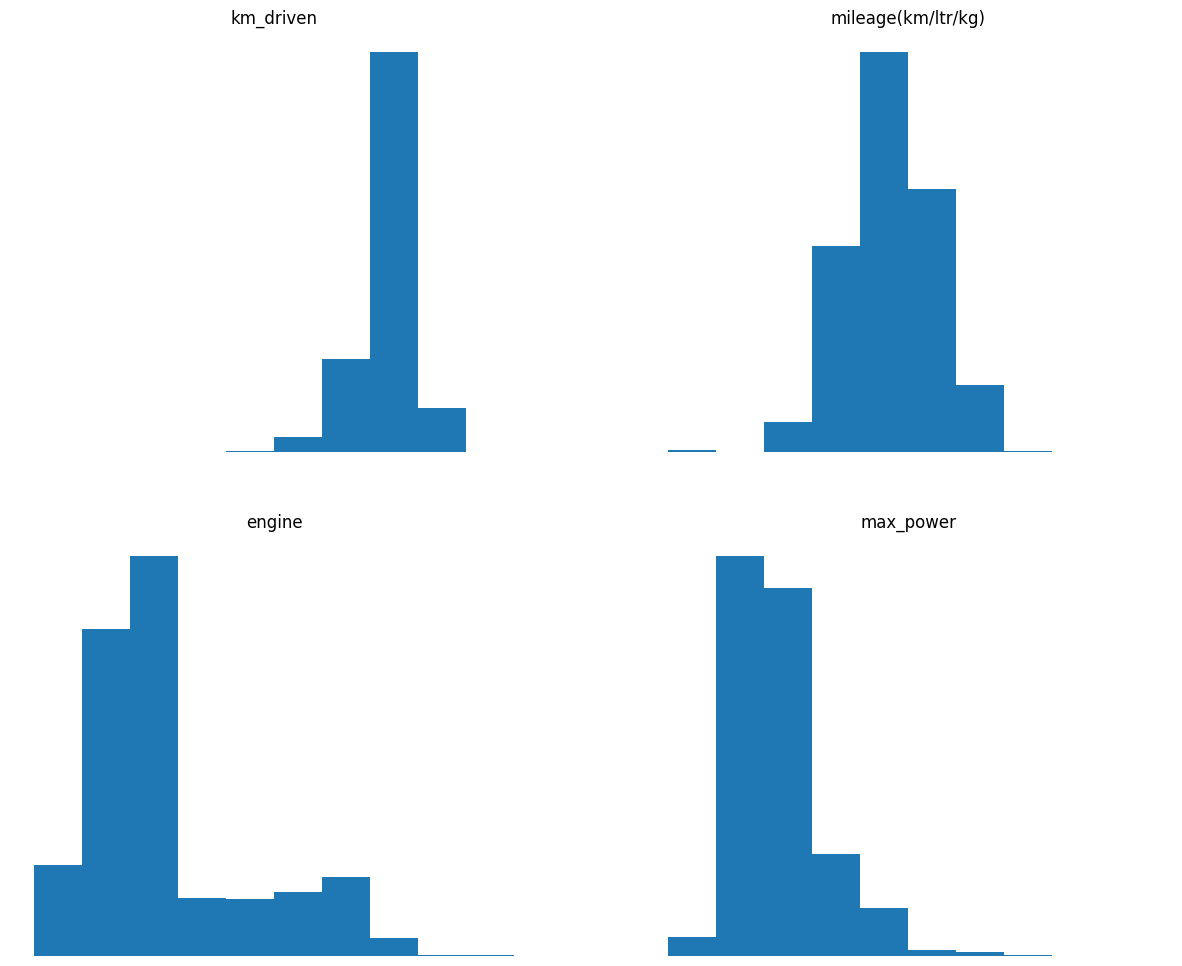

In [33]:
continuous_columns = ['km_driven', 'mileage(km/ltr/kg)', 'engine', 'max_power']
plt.figure(figsize = (15,12))
for index, col in enumerate(continuous_columns):
    plt.subplot(2, 2, index + 1)
    plt.axis('off')
    plt.title(col)
    plt.hist(preprocessed_df[col])
plt.show()

In [34]:
preprocessed_df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,1307,2014,450000,11.887931,1,1,1,0,23.40,1248.0,74.00,5.0
1,1607,2014,370000,11.695247,1,1,1,2,21.14,1498.0,103.52,5.0
2,385,2006,158000,11.849398,3,1,1,4,17.70,1497.0,78.00,5.0
3,781,2010,225000,11.751942,1,1,1,0,23.00,1396.0,90.00,5.0
4,1349,2007,130000,11.695247,3,1,1,0,16.10,1298.0,88.20,5.0


# Modeling

In [35]:
# Split data into input and label data
X = preprocessed_df.drop(columns = ['selling_price'])
Y = preprocessed_df['selling_price']
print(f'size of input data {X.shape}')
print(f'size of input data {Y.shape}')

size of input data (8128, 11)
size of input data (8128,)


In [36]:
# Split data into train and test data
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.12, random_state = 42)
print(f'x train size {x_train.shape}, x test size {x_test.shape}')
print(f'y train size {y_train.shape}, y test size {y_test.shape}')

x train size (7152, 11), x test size (976, 11)
y train size (7152,), y test size (976,)


In [37]:
# Function to visualize actual and predicted lables
def plot(y_train, y_train_pred, y_test, y_test_pred):
    plt.figure(figsize = (7,7))
    plt.title('Y train VS predicted Y train')
    plt.xlabel('Y train')
    plt.ylabel('predicted Y train')
    plt.scatter(y_train, y_train_pred, color = 'red', marker = 'X')
    plt.plot(range(int(min(y_train)), int(max(y_train))), color = 'black')
    plt.show()
    plt.figure(figsize = (7,7))
    plt.title('Y test VS predicted Y test')
    plt.xlabel('Y test')
    plt.ylabel('predicted Y test')
    plt.scatter(y_test, y_test_pred, color = 'blue', marker = 'o')
    plt.plot(range(int(min(y_test)), int(max(y_test))), color = 'black')
    plt.show()

In [38]:
# function to perform all functionalities of model
def model_functionality(model, x_train, y_train, x_test, y_test):
    
    # Create regression model
    reg_model = model
    reg_model.fit(x_train, y_train)
    
    # Get scores of the model on train and test data
    score_train = reg_model.score(x_train, y_train)
    score_test = reg_model.score(x_test, y_test)
    print(f'train score {score_train}, test score {score_test}')
    
    # Make model predict on train and test 
    predicted_y_train = reg_model.predict(x_train)
    predicted_y_test = reg_model.predict(x_test)
    plot(y_train, predicted_y_train, y_test, predicted_y_test)
    
    # Find model's error on train and test data using mean squared error metric
    train_error = mean_squared_error(y_train, predicted_y_train)
    test_error = mean_squared_error(y_test, predicted_y_test)
    
    print(f'train error {train_error}, test error {test_error}\n\n')
    
    return reg_model

In [39]:
# Create all models
models = {
    'Linear regression model': LinearRegression(), 
    'Ridge regression model': Ridge(), 
    'Lasso regression model': Lasso(), 
    'Elastic regression model': ElasticNet(), 
    'Decision tree model': DecisionTreeRegressor(),
    'Gradient boosting model': GradientBoostingRegressor(),
    'K-nearest neighbors model': KNeighborsRegressor(),
    'Random forest model': RandomForestRegressor()
}

Linear regression model:

train score 0.6892218701051644, test score 0.6882005971307782


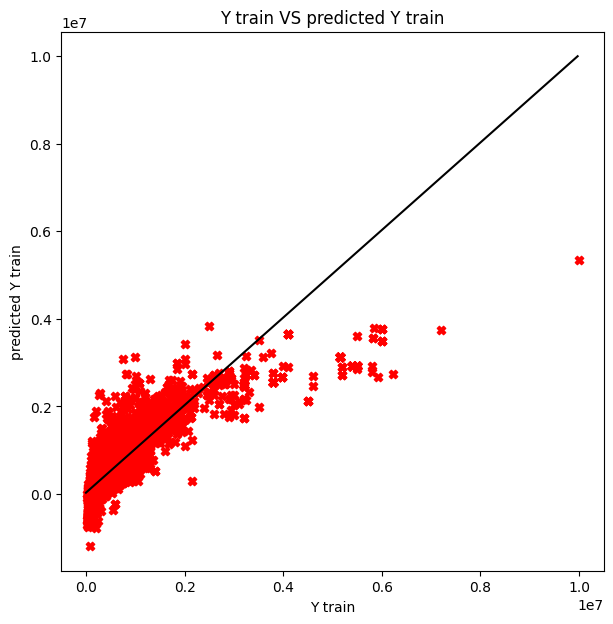

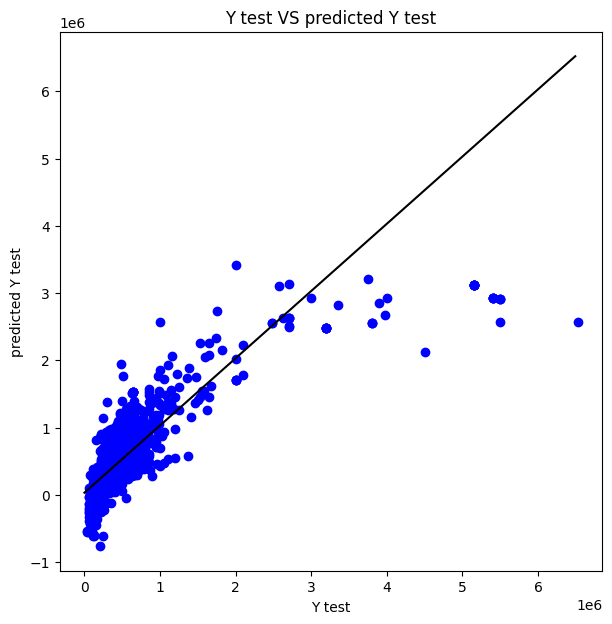

train error 199698290318.80103, test error 219527852800.06314


Ridge regression model:

train score 0.6892217862466268, test score 0.6881941168384358


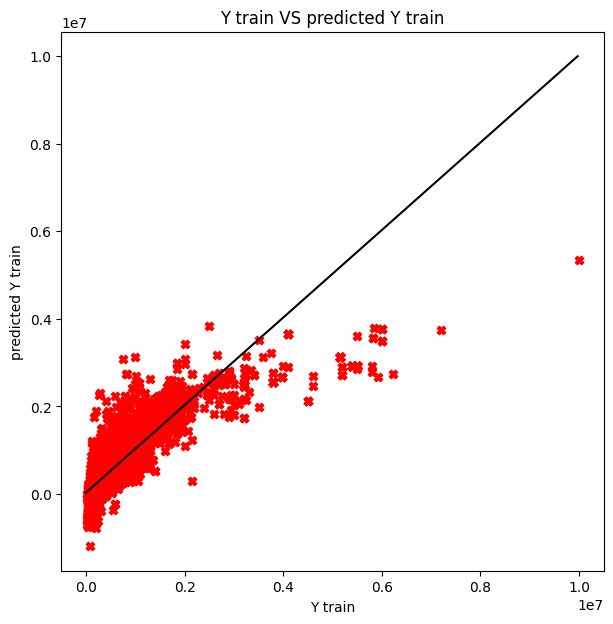

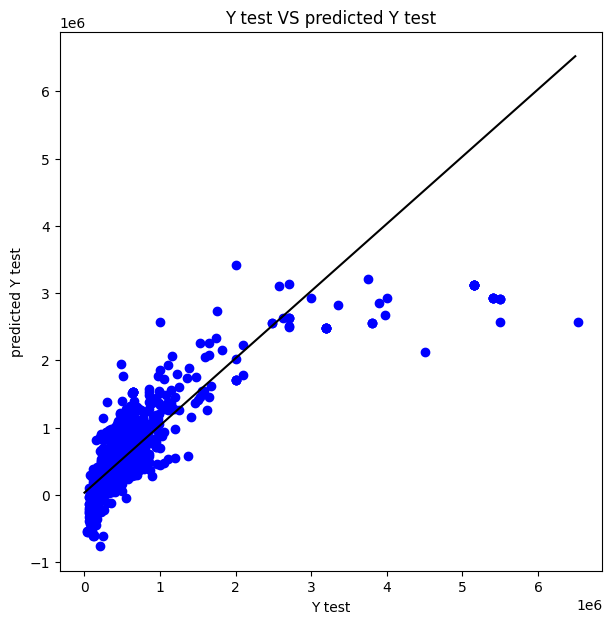

train error 199698344204.20987, test error 219532415363.84726


Lasso regression model:

train score 0.6892218700704511, test score 0.6882006708944166


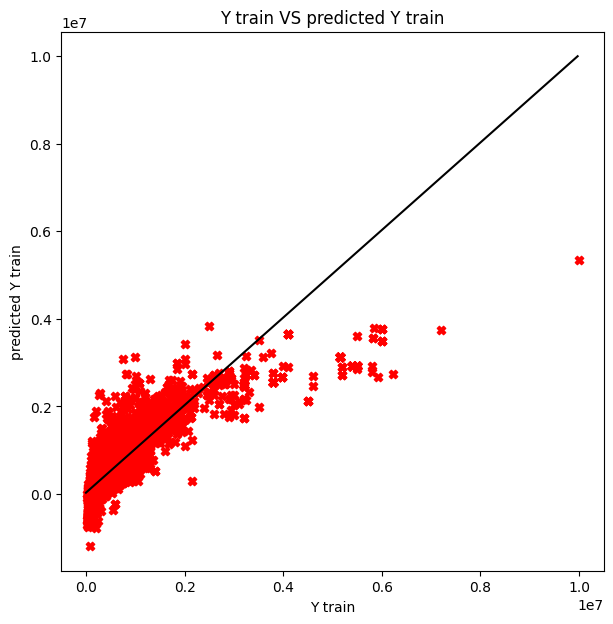

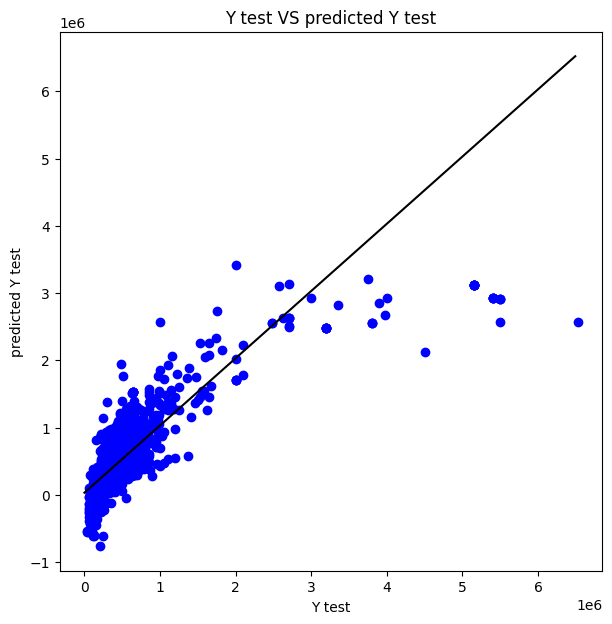

train error 199698290341.10693, test error 219527800865.47632


Elastic regression model:

train score 0.6609544147585604, test score 0.6605436243472678


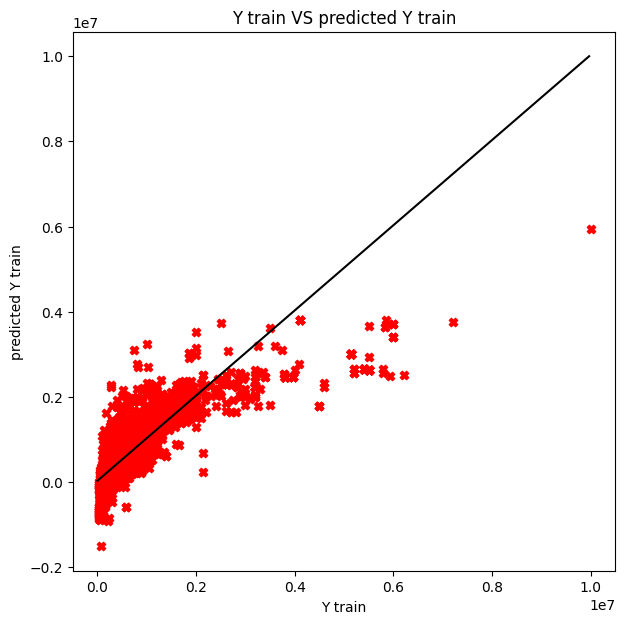

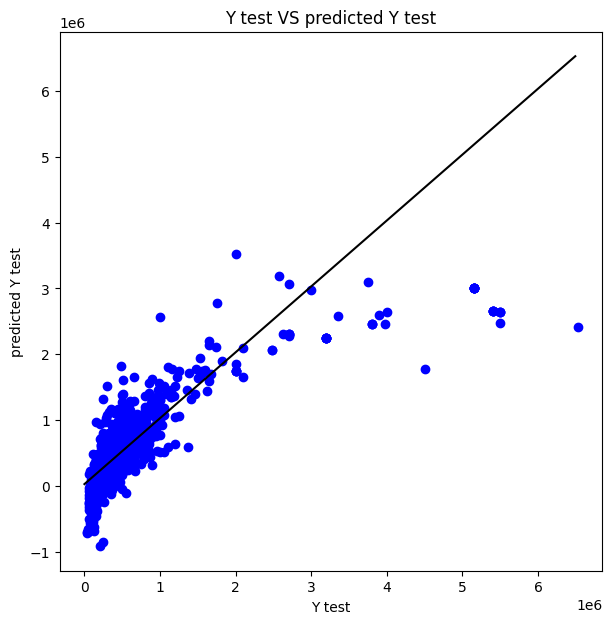

train error 217862253485.35355, test error 239000230855.45154


Decision tree model:

train score 0.9998547494386893, test score 0.9712055245539745


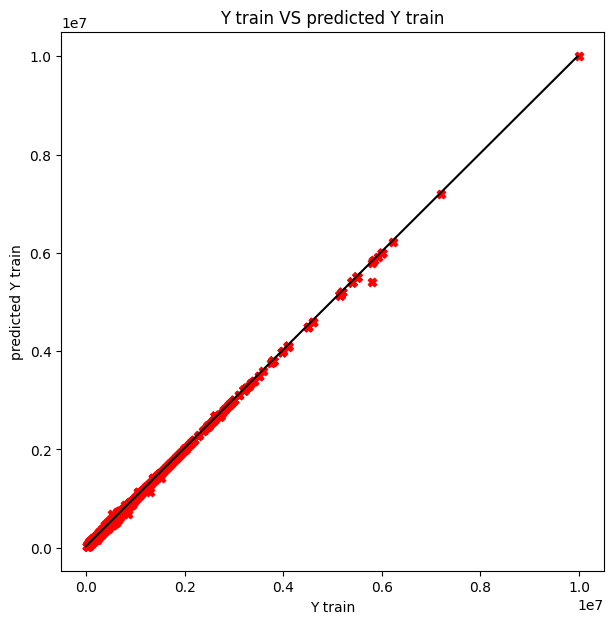

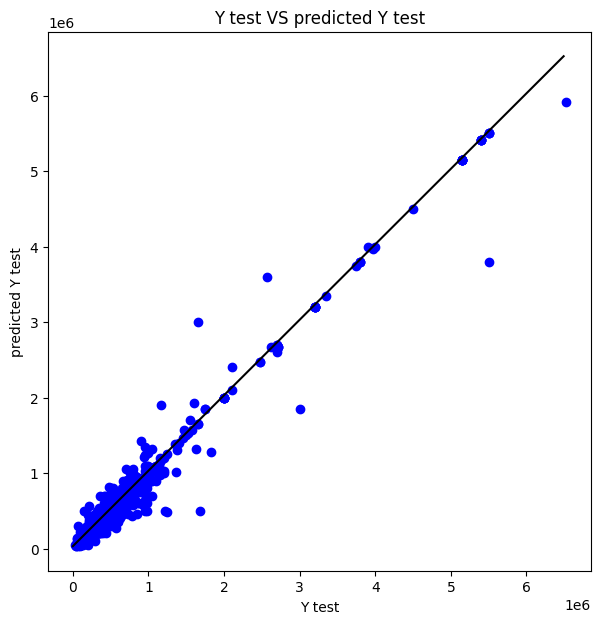

train error 93334395.09206857, test error 20273256808.709846


Gradient boosting model:

train score 0.9736657508649641, test score 0.9691139784261147


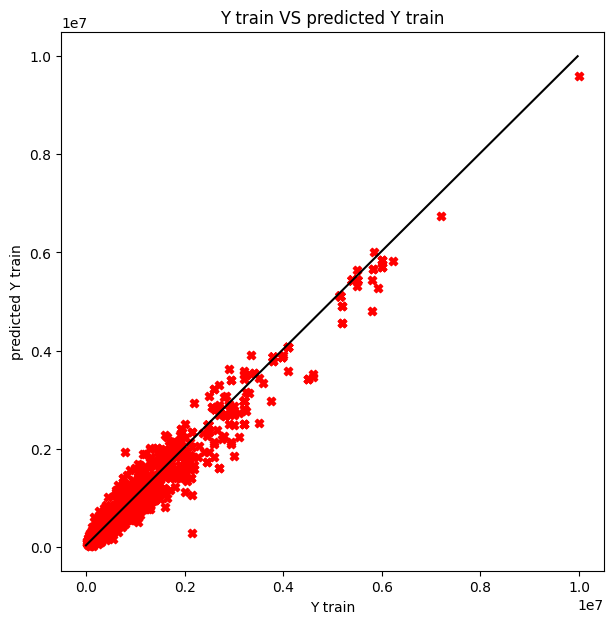

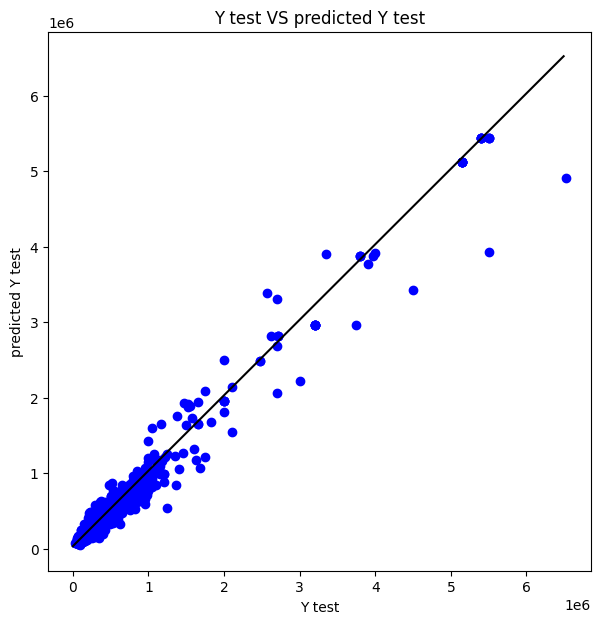

train error 16921732976.756098, test error 21745846641.32712


K-nearest neighbors model:

train score 0.949144143127753, test score 0.9300296037780628


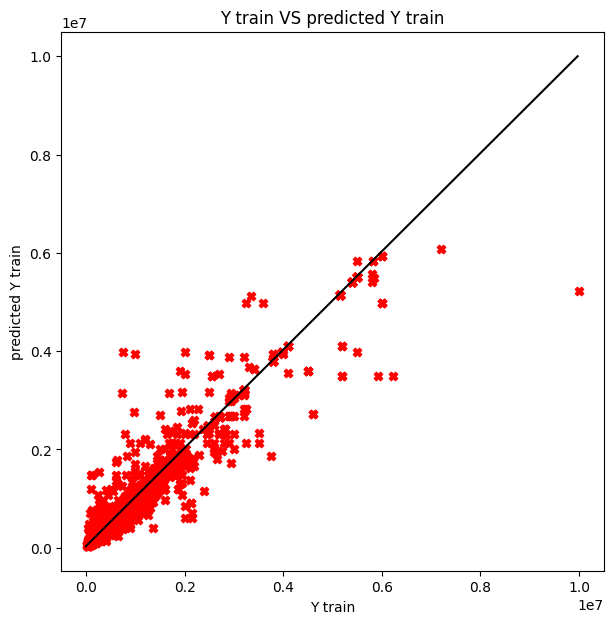

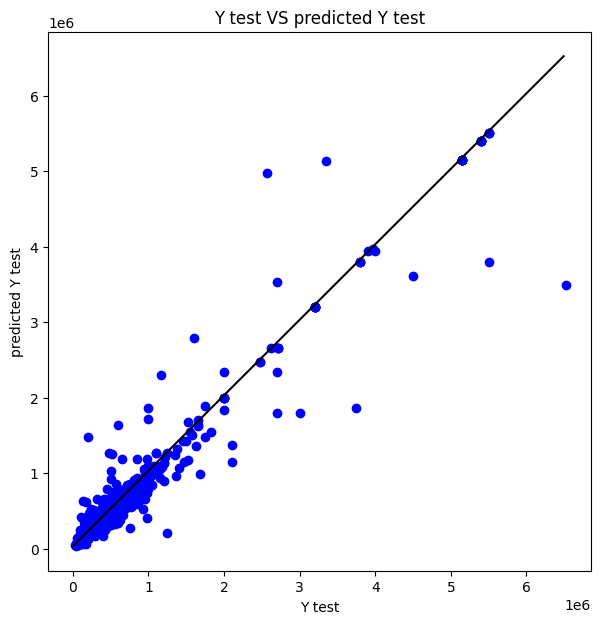

train error 32678707711.903744, test error 49263887938.27865


Random forest model:

train score 0.9958398222589243, test score 0.9785267956189263


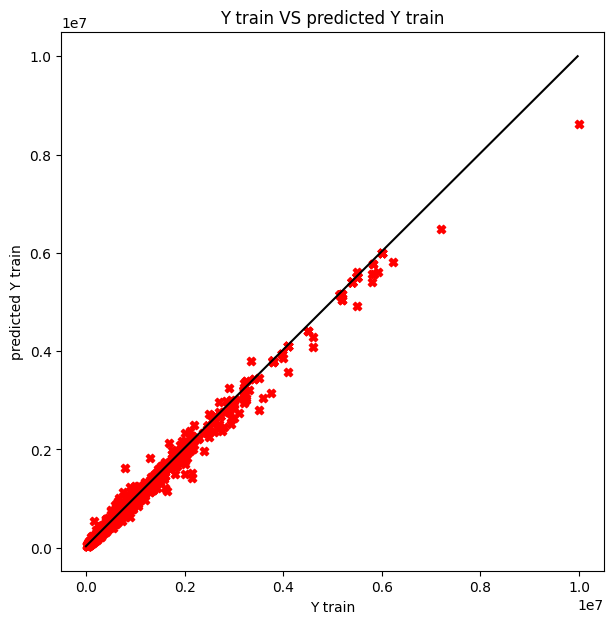

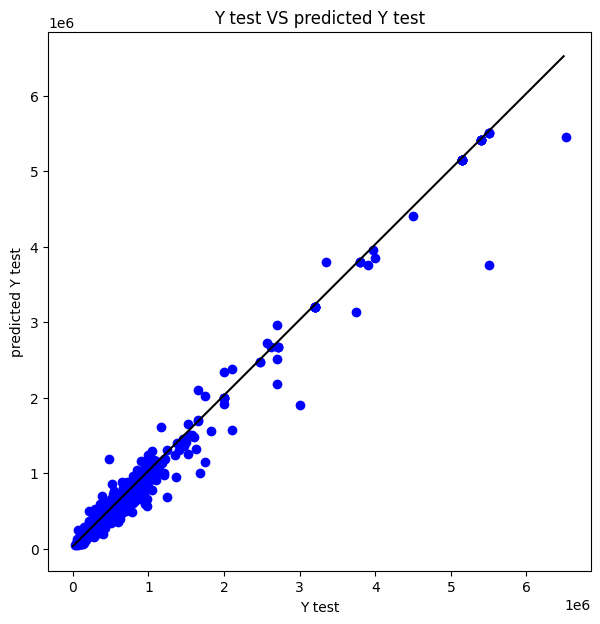

train error 2673226660.4354463, test error 15118587165.772108




In [40]:
# Train each model and plot the results
all_trained_models = {}
for name, model in models.items():
    print(name, end=':\n\n')
    trained_model = model_functionality(model, x_train, y_train, x_test, y_test)
    all_trained_models[name] = deepcopy(trained_model)

In [41]:
# Show all models with their names
all_trained_models

{'Linear regression model': LinearRegression(),
 'Ridge regression model': Ridge(),
 'Lasso regression model': Lasso(),
 'Elastic regression model': ElasticNet(),
 'Decision tree model': DecisionTreeRegressor(),
 'Gradient boosting model': GradientBoostingRegressor(),
 'K-nearest neighbors model': KNeighborsRegressor(),
 'Random forest model': RandomForestRegressor()}

### Based on the previous results, the Random forest model is the best one on the test data with accuracy 97.6%, so we will access it to analyze the previous results

In [42]:
# Get random forest model again to work with 
Random_forest_model = all_trained_models['Random forest model']
Random_forest_model

RandomForestRegressor()

In [43]:
# Find all features with its importance
importances = Random_forest_model.feature_importances_
features = x_train.columns

# combine features with its importance in one dataframe
features_with_importances = pd.DataFrame({'Features':features, 'Importance':importances})

# Sort dataframe based on importance column
features_with_importances = features_with_importances.sort_values(['Importance'], ascending = False)
features_with_importances

,Features,Importance
9,max_power,0.721082
1,year,0.181529
2,km_driven,0.030360
0,name,0.021224
8,engine,0.016170
7,mileage(km/ltr/kg),0.015757
10,seats,0.004288
3,fuel,0.003169
4,seller_type,0.002610
5,transmission,0.002246


# Save best model and label encoders

In [44]:
# Save the dictionary of label encoders
joblib.dump(label_encoders, 'label_encoders.sav')

['label_encoders.sav']

In [45]:
# Save the trained RandomForest model
joblib.dump(Random_forest_model, 'Random_forest_model.sav')

['Random_forest_model.sav']

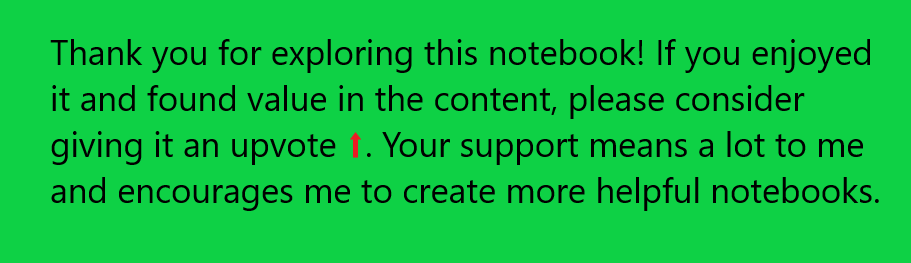